In [1]:
import sys
import numpy
import matplotlib
import seaborn
import scipy
import sklearn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('D:\CreditCardFraudDetection-master/creditcardcsvpresent.csv')
#data=data.dropna()
#data.isna().any()

In [28]:
print(data.columns)

Index(['Merchant_id', 'Transaction date', 'Average Amount/transaction/day',
       'Transaction_amount', 'Is declined', 'Total Number of declines/day',
       'isForeignTransaction', 'isHighRiskCountry', 'Daily_chargeback_avg_amt',
       '6_month_avg_chbk_amt', '6-month_chbk_freq', 'Fraud'],
      dtype='object')


In [30]:
#data = data.sample(frac = 0.4, random_state=1)
data.drop(['Merchant_id','Transaction date','Is declined','isForeignTransaction','isHighRiskCountry'],axis =1,inplace =True)
print(data.shape)

(3075, 7)


In [31]:
Fraud = data[data['Fraud']=='Y']
Valid = data[data['Fraud']=='N']
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases : {}'.format(len(Fraud)))
print('Valid Cases : {}'.format(len(Valid)))

0.1705367339170156
Fraud Cases : 448
Valid Cases : 2627


In [32]:
Fraud.head()

,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,Fraud
0,100.0,3000.0,5,0,0.0,0,Y
1,100.0,4300.0,5,0,0.0,0,Y
2,185.5,4823.0,5,0,0.0,0,Y
3,185.5,5008.5,8,0,0.0,0,Y
4,500.0,26000.0,0,800,677.2,6,Y


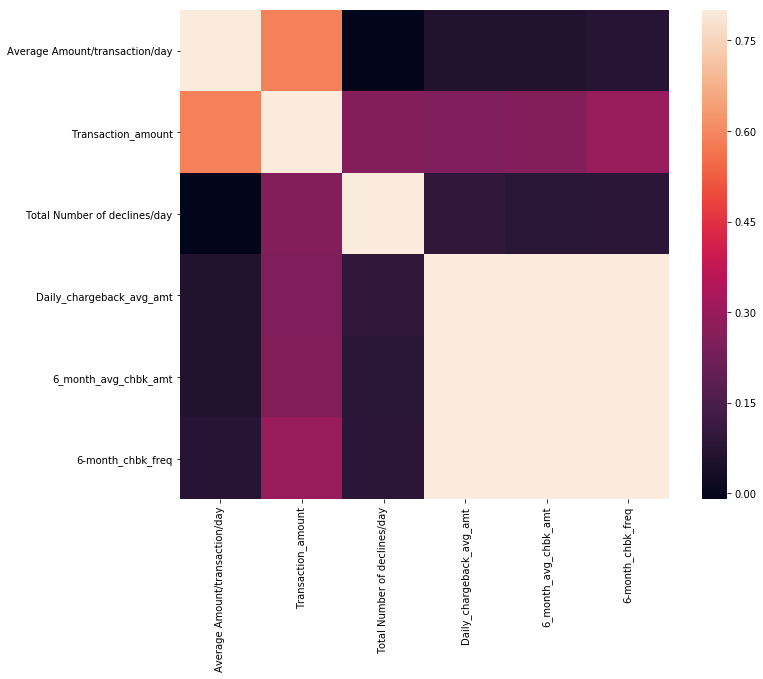

In [33]:
corrmat= data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat,vmax = .8,square = True)
plt.show()

In [34]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['Fraud']]
target = 'Fraud'
X= data[columns]
Y= data[target]
print(X.shape)
print(Y.shape)

(3075, 6)
(3075,)


In [35]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [36]:
inliers = data[data.Fraud=='N']
inliers = inliers.drop(['Fraud'], axis=1)
outliers = data[data.Fraud=='Y']
outliers = outliers.drop(['Fraud'], axis=1)
inliers_train, inliers_test = train_test_split(inliers, test_size=0.10, random_state=42)

In [37]:
inliers_train.head()

,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
499,757.670898,10607.392580,1,0,0.0,0
2668,213.411176,3627.989995,0,0,0.0,0
2436,115.041900,2185.796100,0,0,0.0,0
2631,969.804983,25214.929570,0,0,0.0,0
2239,923.395008,5540.370046,0,0,0.0,0


In [38]:
inliers_test.head()

,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
669,299.001760,6578.038711,0,0,0.0,0
766,744.124142,22323.724280,0,0,0.0,0
1374,38.308706,536.321891,1,0,0.0,0
2935,895.310042,0.000000,1,0,0.0,0
1868,524.318934,10486.378690,0,0,0.0,0


In [39]:
model = IsolationForest()
model.fit(inliers_train) 
inlier_pred_test = model.predict(inliers_test)
outlier_pred = model.predict(outliers)

C:\Users\asmita\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\asmita\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\asmita\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\asmita\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [40]:
print("Accuracy in Detecting Legit Cases:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
print("Accuracy in Detecting Fraud Cases:", list(outlier_pred).count(-1)/outlier_pred.shape[0])

Accuracy in Detecting Legit Cases: 0.9429657794676806
Accuracy in Detecting Fraud Cases: 0.7879464285714286


In [41]:
import pickle
from sklearn.externals import joblib
filename = 'credit_detect.pkl'
joblib.dump(model, filename)

['credit_detect.pkl']